# **Estudio Framingham de riesgo cardiovascular**

### **ABSTRACT**

Una pequeña ciudad en Massachusetts, Framingham, donde en 1948 un grupo de científicos decidió revelar los misterios del corazón humano. Así nació el Estudio de Framingham, una investigación que ha seguido a miles de personas a lo largo de tres generaciones, para relacionar datos y factores de riesgo con el fin de contribuir a la prevención de enfermedad cardiovascular (ECV).

En este estudio, nos sumergimos en los datos del Framingham Heart Study extraído de Kaggle, con el objetivo de descubrir patrones ocultos y relaciones significativas que puedan predecir ECV a 10 años. Comenzamos nuestro viaje con un Análisis Exploratorio de Datos (EDA), utilizando herramientas de visualización para dar luz a patrones ocultos y relaciones entre variables. Identificamos valores nulos y outliers, asegurándonos de que nuestros datos logren la mayor precisión y depuración posible para el buen funcionamiento de los modelos predictivos.

Nutridos del EDA, nos aventuramos en el mundo del machine learning. Probamos diferentes modelos, cada uno con su propio enfoque para resolver la predicción. Evaluamos su precisión y capacidad predictiva, buscando el modelo que pueda prever con mayor certeza quién está en riesgo de sufrir una enfermedad cardiovascular.

Los hallazgos de este estudio no solo nos acercan a comprender mejor los factores de riesgo, sino que también demuestran el poder de la inteligencia artificial en la medicina preventiva. Con cada predicción acertada, damos un paso más hacia un futuro donde las enfermedades del corazón puedan ser detectadas y tratadas a tiempo.

### **AUDIENCIA OBJETIVO**

El presente proyecto está destinado a los profesionales de la medicina cardiovascular, quienes podrían beneficiarse de la inteligencia artificial para predecir ECV y tomar acciones terapéuticas e higiénico - dietéticas para los pacientes con screening de riesgo. 

### **Key Features**

##### **Datos demográficos**: género, edad y nivel educativo.
##### **Indicadores de salud**: tabaquismo, presión arterial, niveles de colesterol, índice de masa corporal (BMI), y niveles de glucosa.
##### **Historia clínica**: prevalencia de ACV, hipertensión arterial, y diabetes.
##### **Variable target**: Riesgo de desarrollar ECV a 10 años
##### **Dataset shape**: el dataset original cuenta 4240 registros x 16 campos (variables). Del total de registros, 582 presentan al menos un valor nulo. Se decide eliminar los registros con valores nulos, quedando un total de **3658 registros (13.72% de pérdida de registros)**. 


In [1]:
# Importo las primeras librerias que vamos a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'https://github.com/matisolica/Proyecto-final-DS2/raw/refs/heads/main/framingham_heart_study.csv'
df = pd.read_csv(data, sep=',') # Importo el dataset
df.head() # Mostrar las primeras 5 filas

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

### **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

In [3]:
df.shape

(4240, 16)

In [4]:
df.isnull().sum() # Verifico si hay valores nulos

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.dropna(inplace=True) # Elimino las filas con valores nulos
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
df.shape # Muestro la nueva cantidad de filas y columnas

(3658, 16)

In [7]:
df.columns # Muestro el nombre de las columnas del df

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.rename(columns={'male' : 'sex'}, inplace=True) # Cambio el nombre de la columna male por sex

In [9]:
df.info() # Información del dataset

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [10]:
df.describe() # Resumen estadístico

sex          age    education  currentSmoker   cigsPerDay  \
count  3658.000000  3658.000000  3658.000000    3658.000000  3658.000000   
mean      0.443685    49.551941     1.980317       0.489065     9.025424   
std       0.496886     8.562029     1.022656       0.499949    11.921590   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3658.000000      3658.000000   3658.000000  3658.000000  3658.000000   
mean      0.030344         0.005741      0.311646     0.027064   236.847731   
std       0.171557         0.075561      0.463229     0.162292    44.097681   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3658.000000  3658.000000  3658.000000  3658.000000  3658.000000   
mean    132.370558    82.917031    25.782802    75.730727    81.852925   
std      22.086866    11.974258     4.065601    11.981525    23.904164   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     143.875000    90.000000    28.037500    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3658.000000  
mean      0.152269  
std       0.359331  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

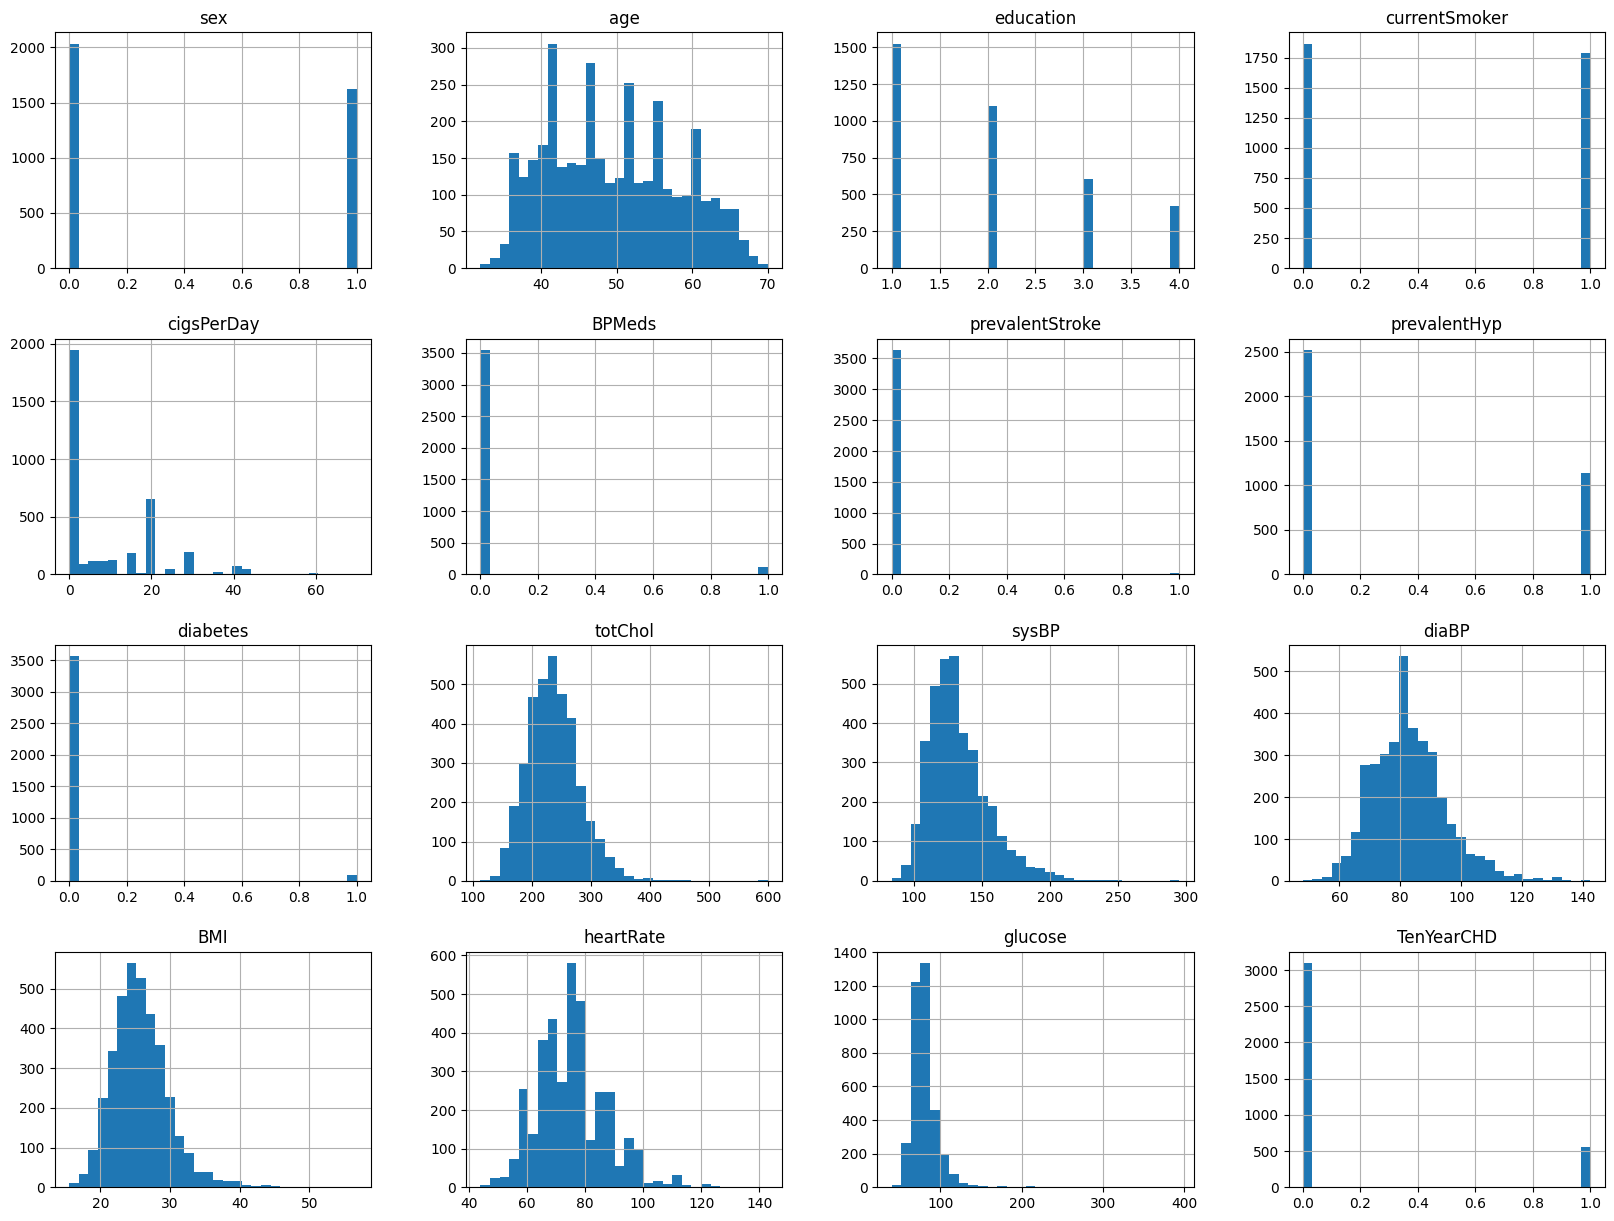

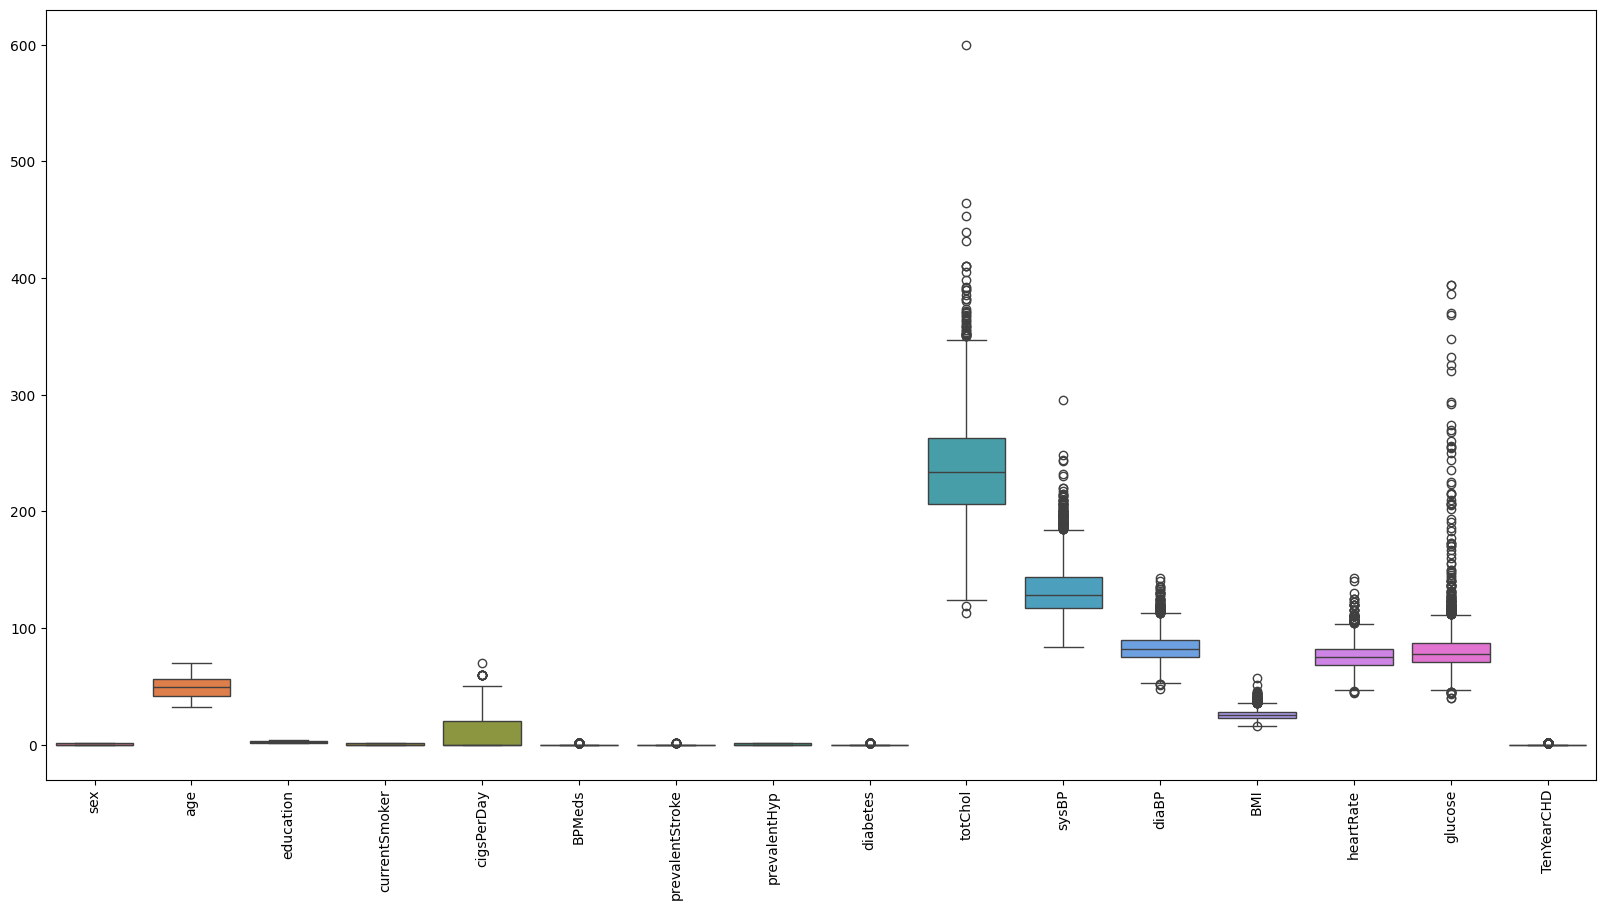

In [11]:
# Histograma de las variables numéricas
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Boxplot de las variables numéricas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

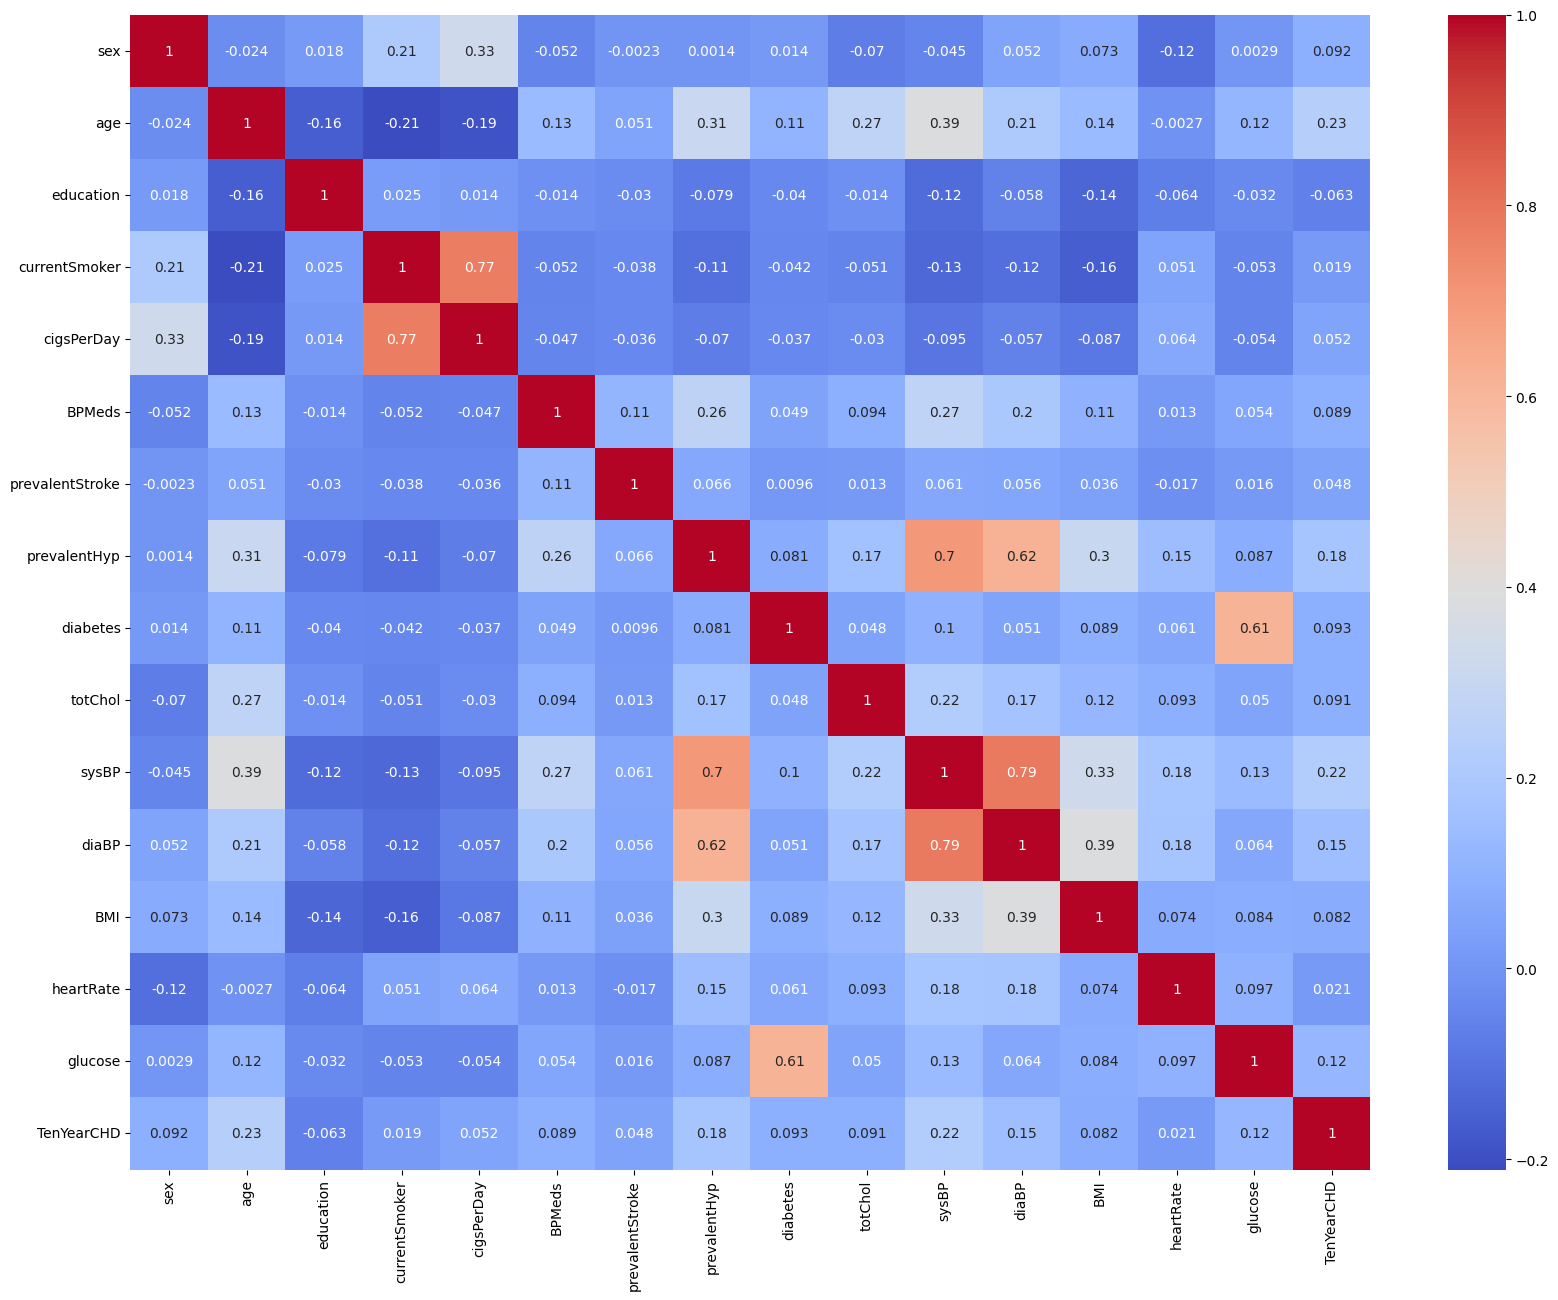

In [12]:
# Matriz de correlación
corr_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Las variables edad y cigarrillos por día hay que redefinirlos en rangos para una mejor visualización

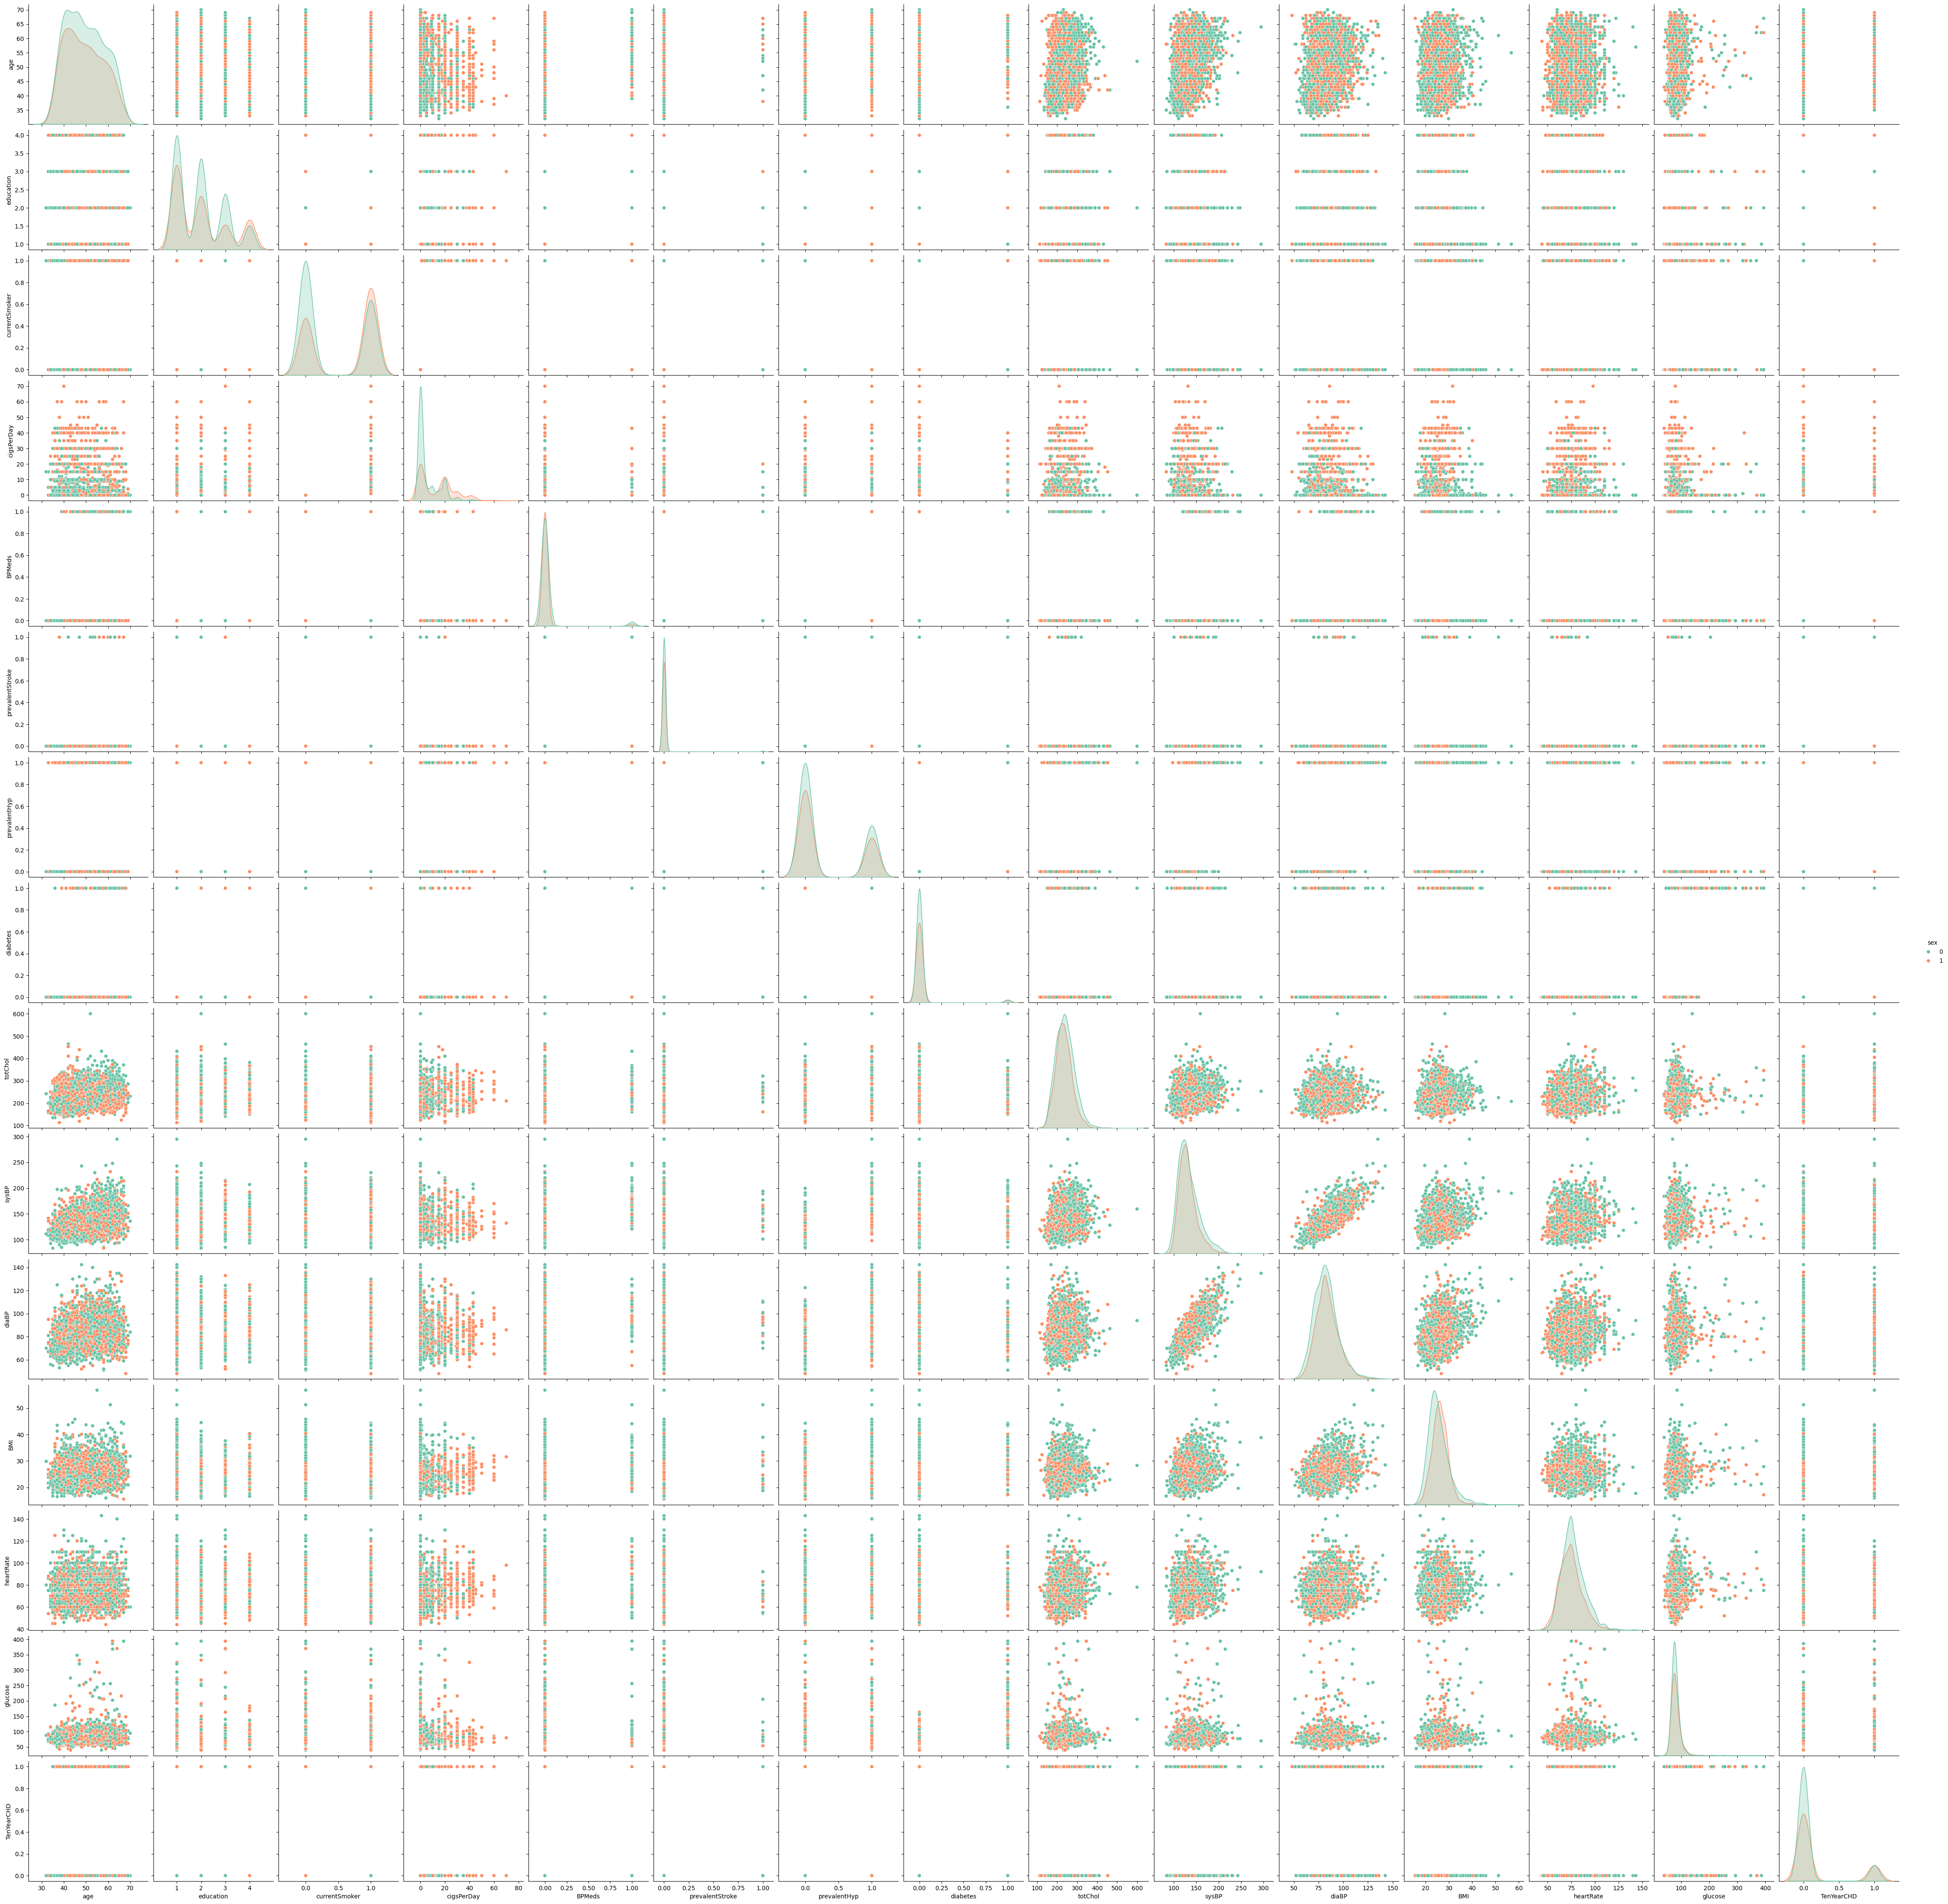

In [13]:
sns.pairplot(df,hue = 'sex' , height = 3 , palette = 'Set2')

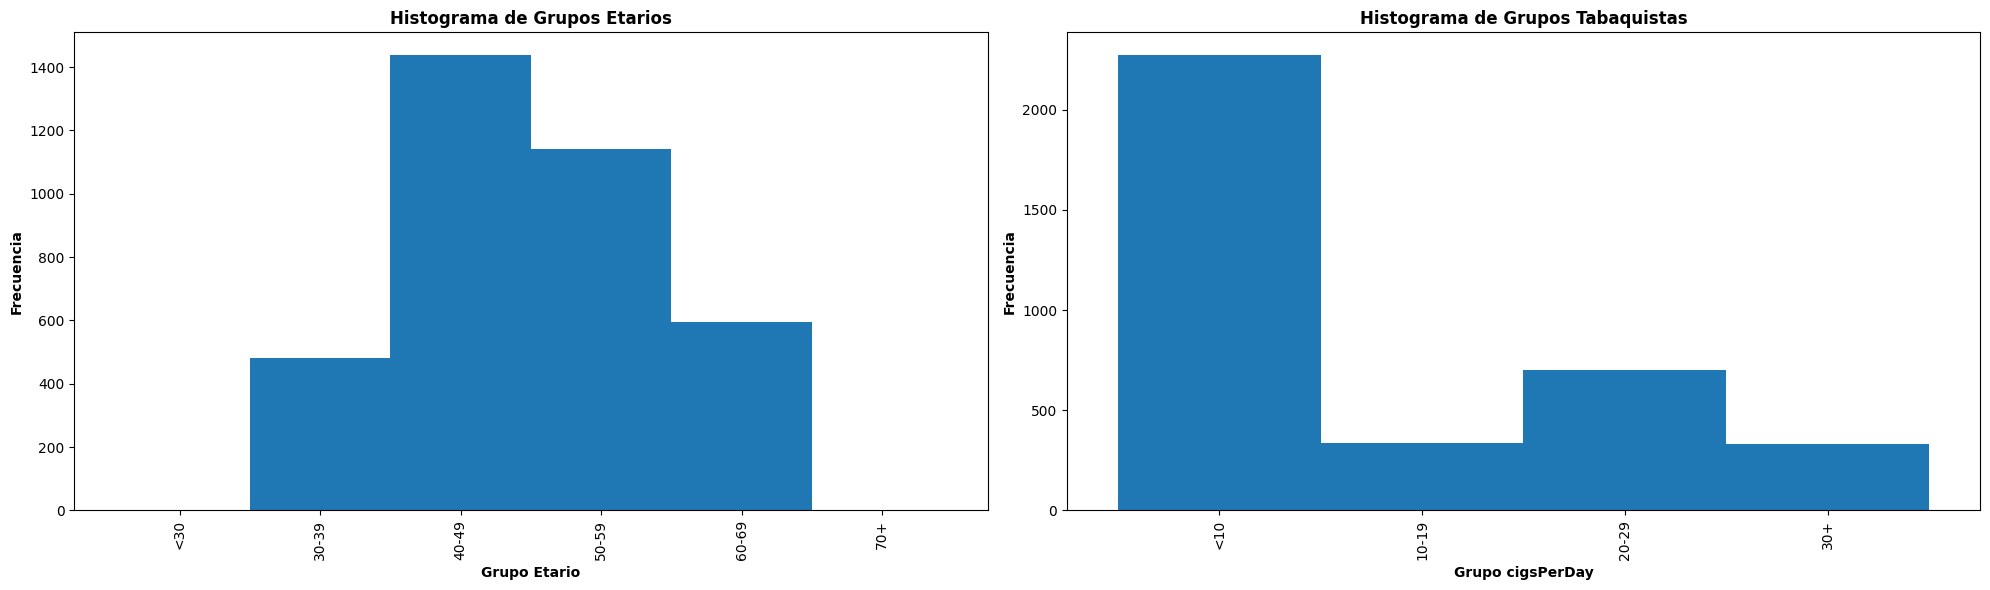

In [14]:
# Definir los rangos etarios y las etiquetas
age_bins = [0, 30, 40, 50, 60, 70, 80]
age_labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']

# Crear una nueva columna para los grupos etarios
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Definir los rangos de cigarrillos diarios y las etiquetas
cigs_bins = [0, 10, 20, 30, 50]
cigs_labels = ['<10', '10-19', '20-29', '30+']

# Crear una nueva columna para los grupos de cigarrillos diarios
df['cigs_group'] = pd.cut(df['cigsPerDay'], bins=cigs_bins, labels=cigs_labels, right=False)

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Graficar el histograma para los grupos etarios
df['age_group'].value_counts(sort=False).plot(kind='bar', width=1, ax=axes[0])
axes[0].set_xlabel('Grupo Etario', fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontweight='bold')
axes[0].set_title('Histograma de Grupos Etarios', fontweight='bold')

# Graficar el histograma para los grupos de cigarrillos diarios
df['cigs_group'].value_counts(sort=False).plot(kind='bar', width=1, ax=axes[1])
axes[1].set_xlabel('Grupo cigsPerDay', fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontweight='bold')
axes[1].set_title('Histograma de Grupos Tabaquistas', fontweight='bold')

plt.tight_layout()
plt.show()

In [15]:
# Definir la función de clasificación para sysBP
def class_sysBP(val):
    if val < 130:
        return 'normal'
    elif 130 <= val <= 179:
        return 'HTA'
    else:
        return 'HTA_Crisis'

# Crear una nueva columna para las clases basadas en los valores de sysBP
df['sysBP_class'] = df['sysBP'].apply(class_sysBP)

# Contar la cantidad de registros por clase
sysBP_df = df[['sysBP', 'sysBP_class']].groupby('sysBP_class').count()

# Ordenar los valores por 'normal', 'HTA' y 'HTA_Crisis'
order = ['normal', 'HTA', 'HTA_Crisis']
sysBP_df = sysBP_df.reindex(order)

# Mostrar el DataFrame ordenado
sysBP_df

sysBP
sysBP_class       
normal        1919
HTA           1592
HTA_Crisis     147

In [16]:
# Definir la función de clasificación para diaBP
def class_diaBP(val):
    if val < 80:
        return 'normal'
    elif 80 <= val <= 109:
        return 'HTA'
    else:
        return 'HTA_Crisis'

# Crear una nueva columna para las clases basadas en los valores de sysBP
df['diaBP_class'] = df['diaBP'].apply(class_diaBP)

# Contar la cantidad de registros por clase
diaBP_df = df[['diaBP', 'diaBP_class']].groupby('diaBP_class').count()

# Ordenar los valores por 'normal', 'HTA' y 'HTA_Crisis'
order = ['normal', 'HTA', 'HTA_Crisis']
diaBP_df = diaBP_df.reindex(order)

# Mostrar el DataFrame ordenado
diaBP_df

diaBP
diaBP_class       
normal        1437
HTA           2122
HTA_Crisis      99

In [17]:
BP_df = pd.concat([sysBP_df, diaBP_df], axis=1)
BP_df


sysBP  diaBP
normal       1919   1437
HTA          1592   2122
HTA_Crisis    147     99

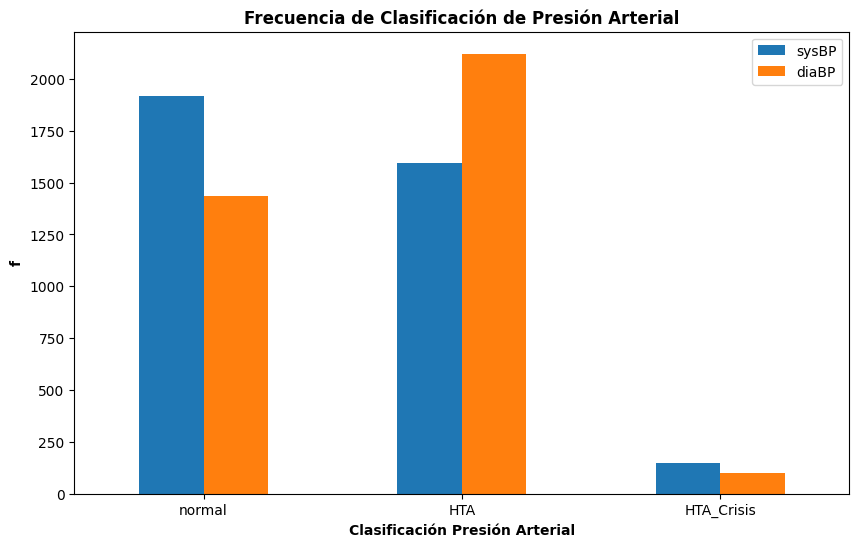

In [18]:
# Crear gráfico de barras combinadas
BP_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Clasificación Presión Arterial', fontweight='bold')
plt.ylabel('f', fontweight='bold')
plt.title('Frecuencia de Clasificación de Presión Arterial', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [19]:
sex_ECV = df[['sex', 'TenYearCHD']].groupby(by='sex').mean().reset_index()
sex_ECV

sex  TenYearCHD
0    0    0.122850
1    1    0.189156

### Modelado Machine Learning

In [20]:
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD age_group cigs_group sysBP_class diaBP_class  
0           0     30-39        <10      normal      normal  
1           0     40-49        <10      normal         HTA  
2           0     40-49      20-29      normal         HTA  
3           1     60-69        30+         HTA         HTA  
4           0     40-49      20-29         HTA         HTA

In [21]:
df = df.drop(['age_group', 'cigs_group', 'sysBP_class', 'diaBP_class'], axis=1)
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalización de las variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [23]:
from sklearn.model_selection import train_test_split

# División del dataset
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

# Árbol de decisión
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

# Random Forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.75      0.02      0.03       176

    accuracy                           0.84      1098
   macro avg       0.80      0.51      0.47      1098
weighted avg       0.83      0.84      0.77      1098

Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       922
           1       0.25      0.25      0.25       176

    accuracy                           0.76      1098
   macro avg       0.56      0.55      0.55      1098
weighted avg       0.76      0.76      0.76      1098

Random Forest:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       922
           1       0.77      0.06      0.11       176

    accuracy                           0.85      1098
   macro avg       0.81      0.53      0.51      1098
weighted avg       0

C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


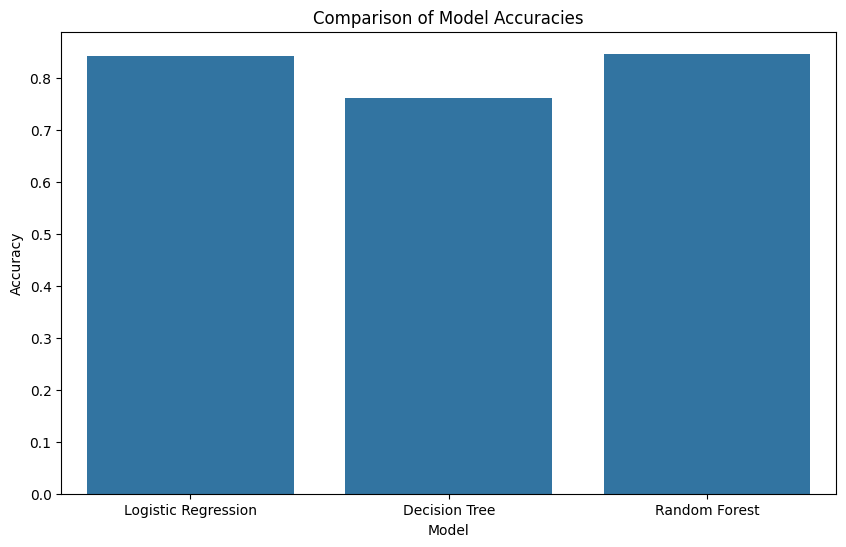

In [25]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)
random_forest_accuracy = accuracy_score(y_test, y_pred_forest)

# Crear un DataFrame con las precisiones de los modelos
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy]
})

# Graficar el barplot comparando las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

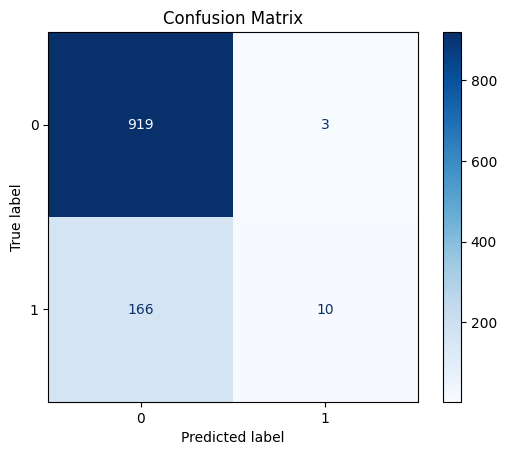

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_forest)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Importancia de las variables en el modelo Random Forest
importances = forest_clf.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

            Feature  Importance
12              BMI    0.131344
10            sysBP    0.129416
9           totChol    0.127031
1               age    0.122639
11            diaBP    0.118119
14          glucose    0.115495
13        heartRate    0.096242
4        cigsPerDay    0.052121
2         education    0.037542
0               sex    0.020074
7      prevalentHyp    0.015205
3     currentSmoker    0.012872
5            BPMeds    0.008285
8          diabetes    0.007024
6   prevalentStroke    0.006592


In [27]:
# Inicializar modelos
svm = SVC()
knn = KNeighborsClassifier()
gbm = GradientBoostingClassifier()
naive_bayes = GaussianNB()

# Entrenar y evaluar SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Entrenar y evaluar KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Entrenar y evaluar GBM
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)

# Entrenar y evaluar Naive Bayes
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, y_pred_naive_bayes)

C:\Users\matis\AppData\Local\Temp\ipykernel_25048\1415728515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',


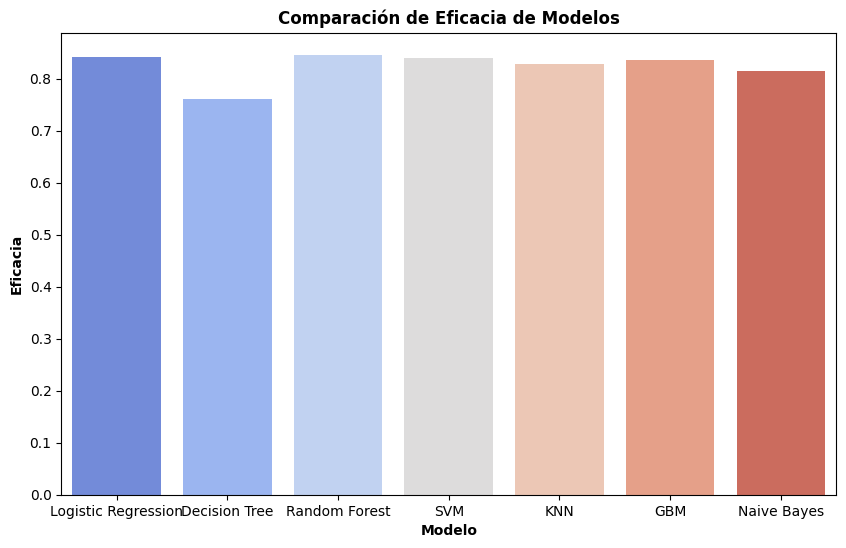

In [28]:
# Crear un DataFrame con las precisiones de los modelos
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest','SVM', 'KNN', 'GBM', 'Naive Bayes'],
    'Accuracy': [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy, svm_accuracy, knn_accuracy, gbm_accuracy, naive_bayes_accuracy]
})

# Graficar el barplot comparando las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', 
            y='Accuracy',
            palette='coolwarm',
            data=accuracy_df)
plt.xlabel('Modelo', fontweight='bold')
plt.ylabel('Eficacia', fontweight='bold')
plt.title('Comparación de Eficacia de Modelos', fontweight='bold')

plt.show()

In [30]:
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
accuracy_df

Model  Accuracy
2        Random Forest  0.846084
0  Logistic Regression  0.841530
3                  SVM  0.839709
5                  GBM  0.836066
4                  KNN  0.827869
6          Naive Bayes  0.814208
1        Decision Tree  0.761384